# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


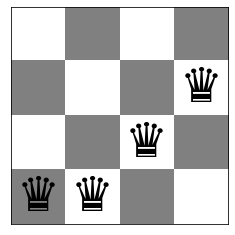

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


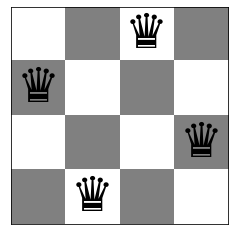

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

In [4]:
#Implementation
    #hill_climb
        #hill climbing function that uses a method parameter to determine its next local move
    #steepest_ascent
        #method to determine next local move using steepest ascent
        #loops through each column and moves queen to each row 
        #saves and returns the local move with the least conflicts

In [5]:
def hill_climb(current_board, n, method, verbose=False):
    while True:
        if verbose: print("NEW LOOP")
        neighbor=method(current_board, n, verbose)
        if conflicts(neighbor)>=conflicts(current_board):
            return current_board
        current_board=neighbor
    
def steepest_ascent(current_board, n, verbose=False):
    best_board=np.copy(current_board)
    #loop through each column
    for i in range(n):
        if verbose: print("  COL",i)
        #find best move for queen
        for j in range(n):
            #move queen
            local_move=np.copy(current_board)
            local_move[i]=j
            #set move to best board if move has less conflicts
            if conflicts(best_board)>conflicts(local_move):
                if verbose: print("    NEW BEST",i,j)
                best_board=np.copy(local_move)
    #return best local move
    return best_board

Board with 8 conflicts.


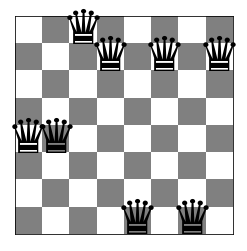

Board with 0 conflicts.


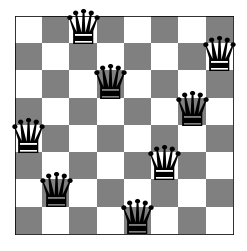

In [6]:
n=8
board = random_board(n)
show_board(board)
show_board(hill_climb(board, n, steepest_ascent))

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [7]:
#Implementation
    #stochastic1
        #method to determine next local move using a stochastic approach
        #loops through each column and moves queen to each row 
        #saves every move that has less conflicts than the current board
        #returns a random move from the list of uphill moves
        #if unable to find a better move, it returns the current board

In [8]:
import random

def stochastic1(current_board, n, verbose=False):
    current_conflicts=conflicts(current_board)
    uphill_moves = []
    #loop through each column
    for i in range(n):
        if verbose: print("  COL",i)
        #find each uphill move for queen
        for j in range(n):
            #move queen
            local_move=np.copy(current_board)
            local_move[i]=j
            #add move to possible moves if uphill
            if current_conflicts>conflicts(local_move):
                if verbose: print("    ADD MOVE",current_conflicts,conflicts(local_move))
                uphill_moves.append(np.copy(local_move))
    #return random uphill move if there are any
    if len(uphill_moves) == 0:
        return current_board
    else:
        return random.choice(uphill_moves)

Board with 8 conflicts.


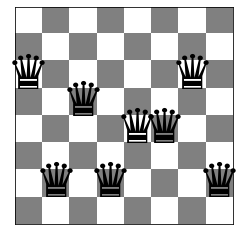

Board with 1 conflicts.


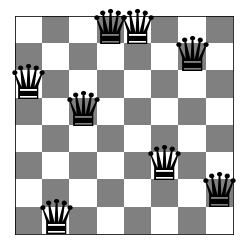

In [9]:
n=8
board = random_board(n)
show_board(board)
show_board(hill_climb(board, n, stochastic1))

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [10]:
#Implementation
    #stochastic2 (first-choice)
        #method to determine next local move using a different stochastic approach
        #loops a number of times based on board size
            #creates a random move with a queen within its column
            #if the random move has less conflicts, it returns the move
            #otherwise, it continues to create another random move
        #if unable to find a better move, it returns the current board

In [11]:
def stochastic2(current_board, n, verbose=False):
    #loop until x tries if stuck on local optima
    for x in range(comb2(n)):
        if verbose: print("  ",x)
        local_move=np.copy(current_board)
        #make a random move
        local_move[np.random.randint(n)]=np.random.randint(n)
        #return move if less conflicts than current board
        if conflicts(current_board)>conflicts(local_move):
            if verbose: print("  NEW MOVE",conflicts(current_board),conflicts(local_move))
            if verbose: print("  MOVE:",local_move)
            return local_move
    if verbose: print("  NO MOVE FOUND")
    #return current board if unable to find better move
    return current_board

Board with 7 conflicts.


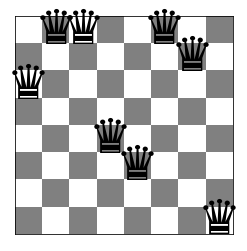

Board with 3 conflicts.


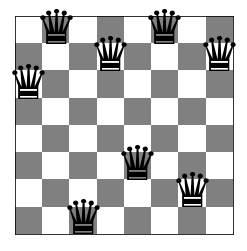

In [12]:
n=8
board = random_board(n)
show_board(board)
show_board(hill_climb(board, n, stochastic2))

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

In [13]:
#Implementation
    #random_restarts
        #2 possible approaches: 
            #loop each method 100 times with a random board
            #loop 100 times and ran each method
        #went with first approach
        #if board is completed with 0 conflicts, the board is returned

In [14]:
def random_restarts(n, verbose=False):
    #attempt each method 100 times with random boards
    methods = [steepest_ascent, stochastic1, stochastic2]
    for method in methods:
        #attempt method 100 times with random boards
        for i in range(100):
            starting_board = random_board(n)
            result_board = hill_climb(starting_board, n, method)
            #return board if optimal solution
            if conflicts(result_board) == 0:
                if verbose: return method, i, starting_board, result_board
                return result_board
    #if no solution was found
    if verbose: return "no solution",0,0,0  
    return random_board(n)

Solution Method: <function steepest_ascent at 0x0000016CC5555F70>
18 Restart Attempts
Starting Board
Board with 22 conflicts.


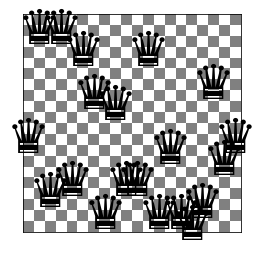

Result Board
Board with 0 conflicts.


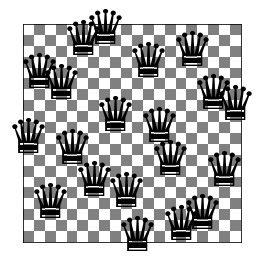

In [15]:
method, attempts, starting_board, result_board=random_restarts(20, verbose=True)
print("Solution Method:", method)
print(attempts,"Restart Attempts")
print("Starting Board")
show_board(starting_board)
print("Result Board")
show_board(result_board)

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

In [16]:
import pandas as pd

data=[]
#run methods for grid sizes of 4, 8, 12, 16, 20, 24
for i in range(4,25,4):
    data.append({
        #get average of 15 runs for each method with random boards
        "Steepest Ascent": sum([conflicts(hill_climb(random_board(i), i, steepest_ascent)) for _ in range(15)])/15,
        "Stochastic 1": sum([conflicts(hill_climb(random_board(i), i, stochastic1)) for _ in range(15)])/15,
        "Stochastic 2": sum([conflicts(hill_climb(random_board(i), i, stochastic2)) for _ in range(15)])/15,
        "Random Restart" : sum([conflicts(random_restarts(i)) for _ in range(15)])/15
    })
    
#combine data for charts and tables
combined_data = {}
for k in data[0].keys():
  combined_data[k] = tuple(combined_data[k] for combined_data in data)

#display average conflicts per grid size chart
df=pd.DataFrame(combined_data, index=["4","8","12","16","20","24"])
print("Avg # of conflicts for increasing grid sizes with 15 runs per size")
display(df.transpose())

Avg # of conflicts for increasing grid sizes with 15 runs per size


,4,8,12,16,20,24
Steepest Ascent,0.733333,1.200000,1.800000,2.266667,2.466667,2.200000
Stochastic 1,0.666667,1.200000,1.733333,2.266667,2.133333,2.400000
Stochastic 2,1.466667,2.466667,3.800000,3.333333,4.266667,3.600000
Random Restart,0.000000,0.000000,0.000000,0.000000,0.000000,1.266667


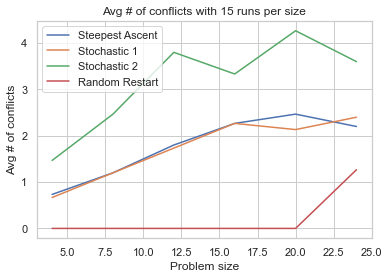

In [17]:
import matplotlib.pyplot as plt

# add a grid to the plots
import seaborn as sns 
sns.set(style="whitegrid")

#plot results
x = range(4,25,4)
plt.plot(x, combined_data["Steepest Ascent"], label = "Steepest Ascent") 
plt.plot(x, combined_data["Stochastic 1"], label = "Stochastic 1") 
plt.plot(x, combined_data["Stochastic 2"], label = "Stochastic 2")
plt.plot(x, combined_data["Random Restart"], label = "Random Restart") 
plt.title("Avg # of conflicts with 15 runs per size")
plt.xlabel("Problem size")
plt.ylabel("Avg # of conflicts")
plt.legend()
plt.show()

From the results shown in the chart above, we can see how each hill-climbing method performs with boards of increasing sizes. The steepest ascent and first stochastic implementations share similar performance. 

We can also see that the first stochastic implementation outperforms the second stochastic (first-choice) implementation. This could be a result of how the random uphill moves are determined for each implementation.

We can observe that the random-restarts implementation was able to solve every board at all sizes up until the board size reached 24. This could be a result of the number times each hill-climbing implementation is restarted (100x). As the board size increases, it might be worthwhile to increase the number restarts for each hill-climbing implementation to ensure the board can be solved.

In [23]:
import time
#find largest board size solution that can be found in a reasonable amount of time (10s)
methods = [steepest_ascent,stochastic1, stochastic2]
for method in methods:
    print("Method:",method)
    t1=0
    t0=0
    solved=False
    n=4
    #loop until a solve takes longer than 10 second
    while t1-t0<10:
        solved=False
        t0 = time.time()
        #set number of attempts incase method can't solve board
        for i in range(100):
            starting_board = random_board(n)
            #solve board
            if conflicts(hill_climb(starting_board, n, method)) == 0:
                #if board is solved, display results
                solved=True
                t1 = time.time()
                print("  Size:",n,", Solved:",solved,", Solve time:",round((t1-t0) * 1e3, 3),"milliseconds, Attempts:",i+1)
                break
        if not solved:
            t1 = time.time()
            print("  Size:",n,", Solved:",solved,", Solve time:",round((t1-t0) * 1e3, 3),"milliseconds, Attempts:",i+1)
        n+=1
#find largest board size solution for random restarts
print("Method:",random_restarts)
t1=0
t0=0
solved=False
n=4
#loop until a solve takes longer than 10 second
while t1-t0<10:
    solved=False
    t0 = time.time()
    #set number of attempts incase method can't solve board
    for i in range(100):
        starting_board = random_board(n)
        #solve board
        if conflicts(random_restarts(n)) == 0:
            #if board is solved, display results
            solved=True
            t1 = time.time()
            print("  Size:",n,", Solved:",solved,", Solve time:",round((t1-t0) * 1e3, 3),"milliseconds, Attempts:",i+1)
            break
    if not solved:
        t1 = time.time()
        print("  Size:",n,", Solved:",solved,", Solve time:",round((t1-t0) * 1e3, 3),"milliseconds, Attempts:",i+1)
    n+=1

Method: <function steepest_ascent at 0x0000016CC5555F70>
  Size: 4 , Solved: True , Solve time: 1.0 milliseconds, Attempts: 1
  Size: 5 , Solved: True , Solve time: 1.001 milliseconds, Attempts: 1
  Size: 6 , Solved: True , Solve time: 4.003 milliseconds, Attempts: 3
  Size: 7 , Solved: True , Solve time: 26.023 milliseconds, Attempts: 9
  Size: 8 , Solved: True , Solve time: 5.004 milliseconds, Attempts: 1
  Size: 9 , Solved: True , Solve time: 18.017 milliseconds, Attempts: 2
  Size: 10 , Solved: True , Solve time: 497.452 milliseconds, Attempts: 47
  Size: 11 , Solved: True , Solve time: 275.25 milliseconds, Attempts: 17
  Size: 12 , Solved: True , Solve time: 377.347 milliseconds, Attempts: 17
  Size: 13 , Solved: True , Solve time: 750.689 milliseconds, Attempts: 25
  Size: 14 , Solved: True , Solve time: 739.677 milliseconds, Attempts: 19
  Size: 15 , Solved: True , Solve time: 1165.062 milliseconds, Attempts: 24
  Size: 16 , Solved: True , Solve time: 1048.385 milliseconds, Atte

The output above shows how each hill-climbing method performed when completely solving boards of increasing size. I believe a reasonable amount of time for a board to be solved would be 10 seconds, so each method was ran with 100 attempts until it took longer than 10 seconds to solve a board.

**Steepest Ascent** - We can see that this algorithm was able to solve boards up to a size of 20 in under 10 seconds.

**Stochastic 1** - We can see that this algorithm was able to solve boards up to a size of 20 in under 10 seconds.

**Stochastic 2** - We can see that this algorithm was able to solve boards up to a size of 23 in under 10 seconds. However, it is important to note that it was not able to solve most boards after size 10 when given 100 attempts.

**Random Restarts** - We can see that this algorithm was able to solve boards up to a size of 18 in under 10 seconds.

## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [21]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [22]:
# Code and description go here